In [1]:
import numpy as np
import matplotlib.pyplot as plt


class BanditArm:
    def __init__(self, m):
        self.m = m
        self.m_estimate = 0
        self.N = 0

    def pull(self):
        return np.random.randn() + self.m

    def update(self, x):
        self.N += 1
        self.m_estimate = (1 - 1.0/self.N)*self.m_estimate + 1.0/self.N*x


In [32]:
def run_experiment(m1, m2, m3, eps, N):
    bandits = [BanditArm(m1), BanditArm(m2), BanditArm(m3)]

    # count number of suboptimal choices
    
    means = [m1, m2, m3]
    
    true_best = np.argmax(means)
    
    count_suboptimal = 0

    data = [0] * N
  
    rewards = [[], [], []]

    for i in range(N):
        # epsilon greedy
        p = np.random.random()
        if p < eps:
            j = np.random.choice(len(bandits))
        else:
            j = np.argmax([b.m_estimate for b in bandits])
        
        # choose the bandit to pull
        x = bandits[j].pull()
        
        bandits[j].update(x)

        if j != true_best:
            count_suboptimal += 1

        # for the plot
        data[i] = x

        rewards[j].append(x)

    cumulative_average = np.cumsum(data) / (np.arange(N) + 1)

    plt.figure(figsize=(8,6))
    plt.plot(np.cumsum(rewards[0]) / (np.arange(len(rewards[0])) + 1) , label = 'Machine 1')
    plt.plot(np.cumsum(rewards[1]) / (np.arange(len(rewards[1])) + 1), label = 'Machine 2')
    plt.plot(np.cumsum(rewards[2])/(np.arange(len(rewards[2])) + 1), label = 'Machine 3')
    plt.title('The Slot Machine Estimation Convergence')
    plt.xscale('log')
    plt.legend()
    plt.show()

    for idx, b in enumerate(bandits):
        print('The Slot Machine', idx, round(b.m_estimate,3))

    print("Percent suboptimal for epsilon = %s:" % eps, float(count_suboptimal) / N)

    
    return np.sum(cumulative_average)



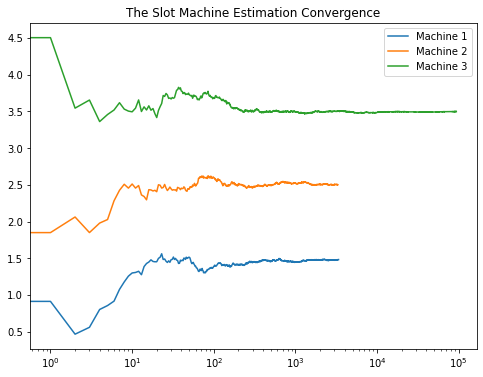

The Slot Machine 0 1.482
The Slot Machine 1 2.502
The Slot Machine 2 3.499
percent suboptimal for epsilon = 0.1: 0.06683


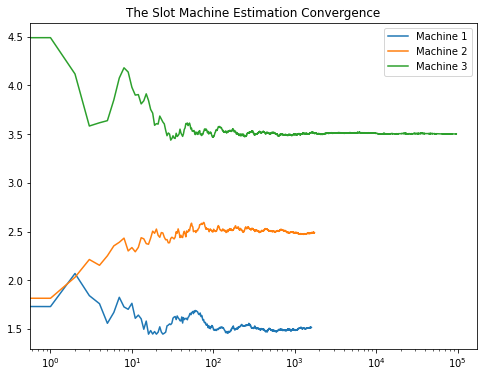

The Slot Machine 0 1.518
The Slot Machine 1 2.489
The Slot Machine 2 3.502
percent suboptimal for epsilon = 0.05: 0.03353


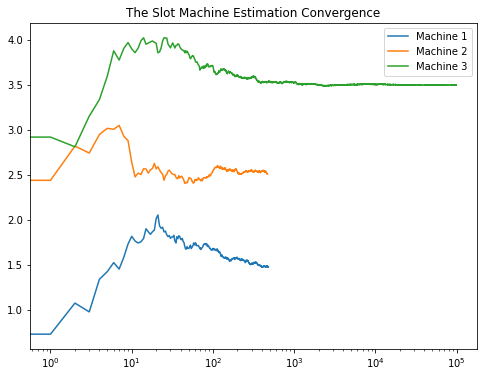

The Slot Machine 0 1.474
The Slot Machine 1 2.506
The Slot Machine 2 3.496
percent suboptimal for epsilon = 0.01: 0.00952


In [34]:
if __name__ == '__main__':
    m1, m2, m3 = 1.5, 2.5, 3.5
    
    c_1 = run_experiment(m1, m2, m3, 0.1, 100000)
    c_05 = run_experiment(m1, m2, m3, 0.05, 100000)
    c_01 = run_experiment(m1, m2, m3, 0.01, 100000)
